# LOADING LIBRARIES

In [1]:
import numpy as np
import nibabel as nib                                                     
import itk                                                                
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# EXPLORING IMAGES<BR>
LOADING IMAGES AS NUMPY ARRAYS

In [2]:
img_path = "data/images/BRATS_001.nii.gz"
image_obj = nib.load(img_path)
print(f'Type of the image {type(image_obj)}')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


In [3]:
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [4]:
height, width, depth, channels = image_data.shape
print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}, channels:{channels}")

The image object has the following dimensions: height: 240, width:240, depth:155, channels:4


# VISUALISATION OF RANDOM LAYER ACROSS SPECIFIED CHANNEL

Plotting Layer 39 Channel 0 of Image


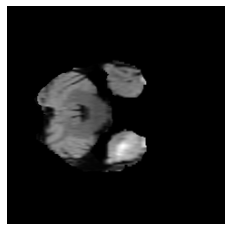

In [5]:
#random layer number
maxval = 154
i = np.random.randint(0, maxval)
#channel to look at
channel = 0
print(f"Plotting Layer {i} Channel {channel} of Image")
plt.imshow(image_data[:, :, i, channel], cmap='gray')
plt.axis('off');

# VISUALISATION OF SINGLE SAMPLE ACROSS DIFFERENT LAYERS

In [6]:
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 3
    plt.imshow(image_data[:, :, layer, channel], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer
    

interact(explore_3dimage, layer=(0, image_data.shape[2] - 1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

# EXPLORING LABELS<BR>
LOADING THE LABELS AS NUMPY ARRAYS

In [7]:
label_path = "./data/labels/BRATS_001.nii.gz"
label_obj = nib.load(label_path)
type(label_obj)

nibabel.nifti1.Nifti1Image

In [8]:
label_array = label_obj.get_fdata()
type(label_array)

numpy.ndarray

In [9]:
height, width, depth = label_array.shape
print(f"Dimensions of labels data array height: {height}, width: {width}, depth: {depth}")
print(f'With the unique values: {np.unique(label_array)}')

Dimensions of labels data array height: 240, width: 240, depth: 155
With the unique values: [0. 1. 2. 3.]


Corresponding to the following label categories:<BR> 
0: for normal <BR>
1: for edema<BR>
2: for non-enhancing tumor <BR>
3: for enhancing tumor

# VISUALISATION OF DIFFERENT CLASSES ACROSS SPECIFIC LAYER

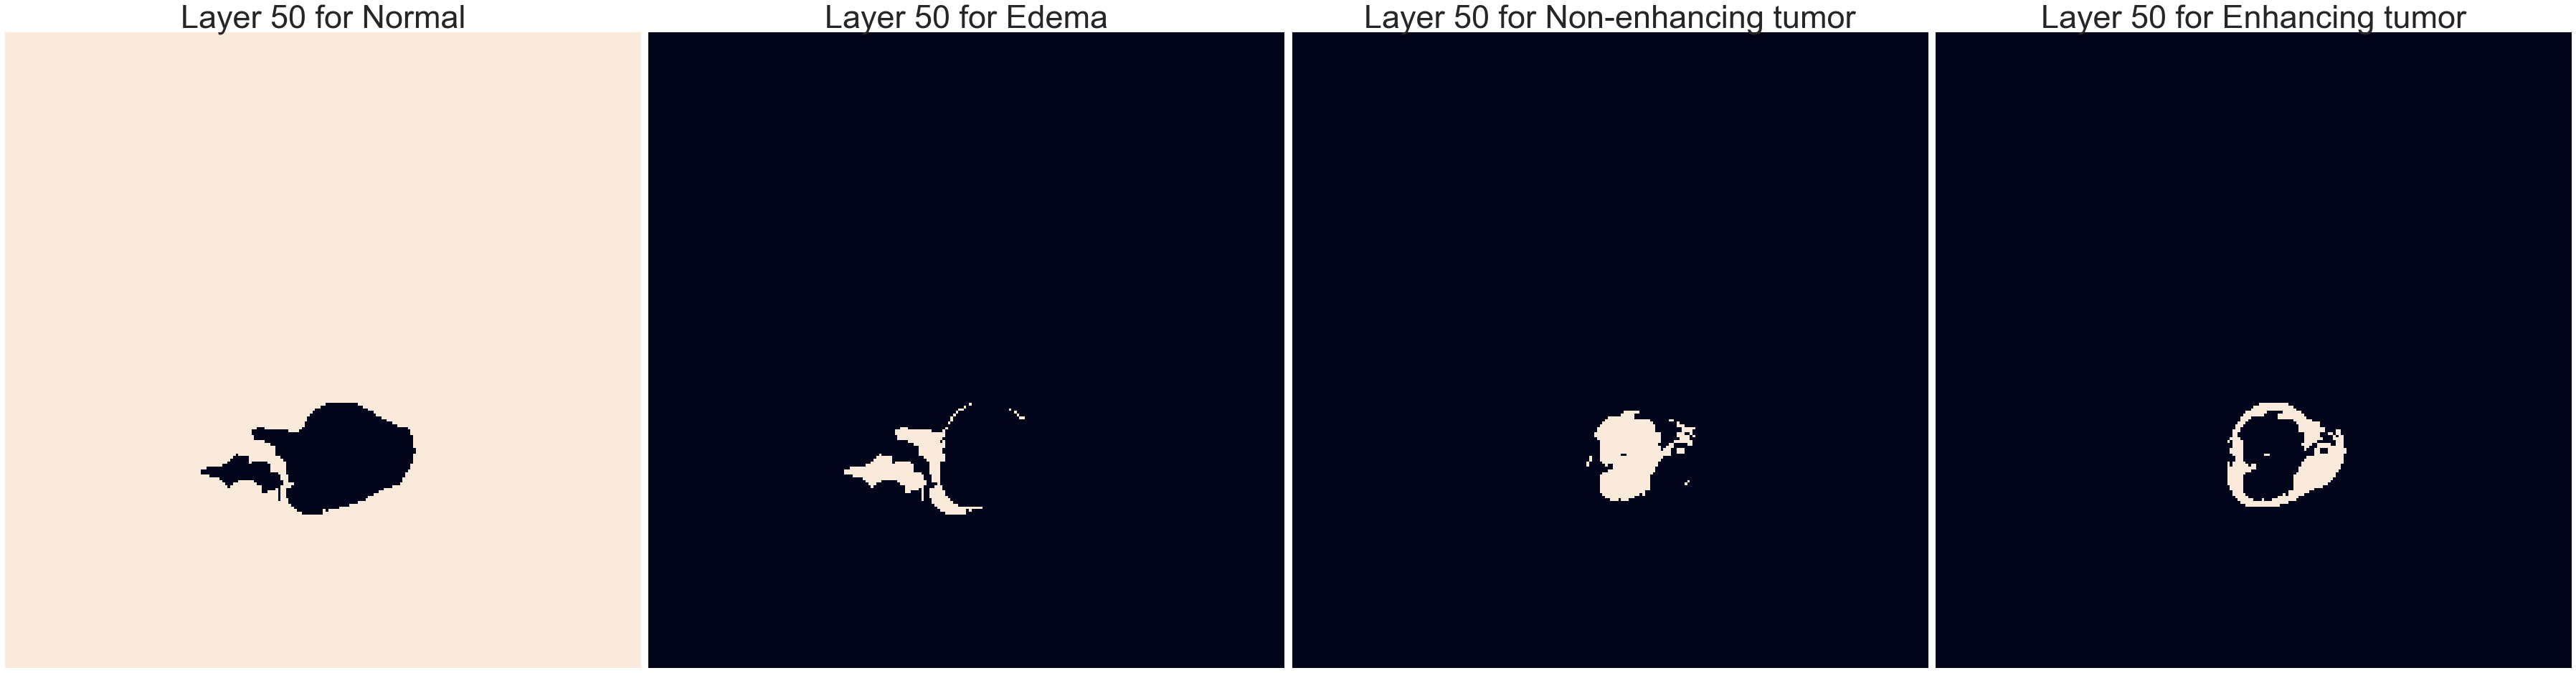

In [10]:
layer = 50

classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 255, 0)
    ax[i].imshow(mask)
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

# VISUALISATION ACROSS DIFFERENT CLASSES AND LAYERS

In [11]:
select_class = ToggleButtons(
    options=['Normal','Edema', 'Non-enhancing tumor', 'Enhancing tumor'],
    description='Select Class:',
    disabled=False,
    button_style='info', 
    
)
#layer slider
select_layer = IntSlider(min=0, max=154, description='Select Layer', continuous_update=False)

    
#function to plot images
def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    img_label = classes_dict[seg_class]
    mask = np.where(label_array[:,:,layer] == img_label, 255, 0)
    plt.figure(figsize=(10,5))
    plt.imshow(mask, cmap='gray')
    plt.axis('off');

#creating the visualization
interactive(plot_image, seg_class=select_class, layer=select_layer)

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('Normal', 'Edem…